# Random Forests Hyperparameter Optimization Notebooks
Adam Klie
08/14/2021

Notebook to get hyperparemter optimization working for RFs

In [5]:
# Classics
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Optuna
import optuna
import joblib

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

In [3]:
import sys
sys.path.append('/cellar/users/aklie/projects/EUGENE/bin/')
import project_utils

In [4]:
import RF_clf_hyperopt

# Script Testing

**Create a study**

In [44]:
# Create a study
study = optuna.create_study(direction="maximize", study_name='test')

[I 2021-08-14 12:20:07,903] A new study created in memory with name: no-name-dbfa87ab-3f63-4047-a118-07007317fe43


**Train/test split**

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
print('Loading data...\n')
X, y = np.loadtxt('../data/2021_OLS_Library/mixed/X_mixed_0.18-0.4.txt', delimiter=' ', dtype=float), np.loadtxt('../data/2021_OLS_Library/y_binary_0.18-0.4.txt', delimiter=' ', dtype=int)
    
# For testing
X, y = X[:100], y[:100]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=13, shuffle=True)

Loading data...



**Optimize**

In [46]:
study.optimize(lambda trial: RF_clf_hyperopt.hyperopt(trial, X_train, X_test, y_train, y_test), n_trials=16, timeout=None, n_jobs=2) 

/cellar/users/aklie/opt/miniconda3/envs/ml_env/lib/python3.8/site-packages/optuna/study/study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(


Starting trial number 0

Starting trial number 1



[I 2021-08-14 12:20:19,927] Trial 0 finished with value: 0.7916666666666667 and parameters: {'RF_n_estimators': 204, 'RF_min_samples_split': 5, 'RF_min_samples_leaf': 2, 'RF_bootstrap': False}. Best is trial 0 with value: 0.7916666666666667.


Trial number 0 complete

Starting trial number 2



[I 2021-08-14 12:20:20,501] Trial 1 finished with value: 0.8333333333333333 and parameters: {'RF_n_estimators': 415, 'RF_min_samples_split': 8, 'RF_min_samples_leaf': 1, 'RF_bootstrap': False}. Best is trial 1 with value: 0.8333333333333333.


Trial number 1 complete

Starting trial number 3



[I 2021-08-14 12:20:20,918] Trial 2 finished with value: 0.875 and parameters: {'RF_n_estimators': 343, 'RF_min_samples_split': 6, 'RF_min_samples_leaf': 5, 'RF_bootstrap': False}. Best is trial 2 with value: 0.875.


Trial number 2 complete

Starting trial number 4



[I 2021-08-14 12:20:21,194] Trial 4 finished with value: 0.7916666666666666 and parameters: {'RF_n_estimators': 110, 'RF_min_samples_split': 9, 'RF_min_samples_leaf': 5, 'RF_bootstrap': False}. Best is trial 2 with value: 0.875.


Trial number 4 complete

Starting trial number 5



[I 2021-08-14 12:20:21,692] Trial 5 finished with value: 0.7916666666666666 and parameters: {'RF_n_estimators': 167, 'RF_min_samples_split': 5, 'RF_min_samples_leaf': 4, 'RF_bootstrap': True}. Best is trial 2 with value: 0.875.


Trial number 5 complete

Starting trial number 6



[I 2021-08-14 12:20:21,988] Trial 3 finished with value: 0.875 and parameters: {'RF_n_estimators': 309, 'RF_min_samples_split': 4, 'RF_min_samples_leaf': 1, 'RF_bootstrap': True}. Best is trial 2 with value: 0.875.


Trial number 3 complete

Starting trial number 7



[I 2021-08-14 12:20:22,933] Trial 6 finished with value: 0.8333333333333334 and parameters: {'RF_n_estimators': 340, 'RF_min_samples_split': 4, 'RF_min_samples_leaf': 1, 'RF_bootstrap': False}. Best is trial 2 with value: 0.875.
[I 2021-08-14 12:20:23,025] Trial 7 finished with value: 0.875 and parameters: {'RF_n_estimators': 346, 'RF_min_samples_split': 6, 'RF_min_samples_leaf': 3, 'RF_bootstrap': True}. Best is trial 2 with value: 0.875.


Trial number 6 complete

Starting trial number 8

Trial number 7 complete

Starting trial number 9



[I 2021-08-14 12:20:23,588] Trial 9 finished with value: 0.7916666666666666 and parameters: {'RF_n_estimators': 153, 'RF_min_samples_split': 2, 'RF_min_samples_leaf': 2, 'RF_bootstrap': True}. Best is trial 2 with value: 0.875.


Trial number 9 complete

Starting trial number 10



[I 2021-08-14 12:20:23,895] Trial 10 finished with value: 0.7916666666666667 and parameters: {'RF_n_estimators': 114, 'RF_min_samples_split': 3, 'RF_min_samples_leaf': 5, 'RF_bootstrap': True}. Best is trial 2 with value: 0.875.
[I 2021-08-14 12:20:23,979] Trial 8 finished with value: 0.7916666666666667 and parameters: {'RF_n_estimators': 288, 'RF_min_samples_split': 2, 'RF_min_samples_leaf': 4, 'RF_bootstrap': False}. Best is trial 2 with value: 0.875.


Trial number 10 complete

Starting trial number 11

Trial number 8 complete

Starting trial number 12



[I 2021-08-14 12:20:24,257] Trial 11 finished with value: 0.7916666666666667 and parameters: {'RF_n_estimators': 21, 'RF_min_samples_split': 8, 'RF_min_samples_leaf': 4, 'RF_bootstrap': False}. Best is trial 2 with value: 0.875.


Trial number 11 complete

Starting trial number 13



[I 2021-08-14 12:20:25,928] Trial 12 finished with value: 0.875 and parameters: {'RF_n_estimators': 492, 'RF_min_samples_split': 7, 'RF_min_samples_leaf': 3, 'RF_bootstrap': True}. Best is trial 2 with value: 0.875.
[I 2021-08-14 12:20:25,931] Trial 13 finished with value: 0.8333333333333333 and parameters: {'RF_n_estimators': 459, 'RF_min_samples_split': 7, 'RF_min_samples_leaf': 2, 'RF_bootstrap': True}. Best is trial 2 with value: 0.875.


Trial number 12 complete

Trial number 13 complete

Starting trial number 14

Starting trial number 15



[I 2021-08-14 12:20:26,821] Trial 15 finished with value: 0.875 and parameters: {'RF_n_estimators': 263, 'RF_min_samples_split': 4, 'RF_min_samples_leaf': 5, 'RF_bootstrap': True}. Best is trial 2 with value: 0.875.
[I 2021-08-14 12:20:26,868] Trial 14 finished with value: 0.875 and parameters: {'RF_n_estimators': 263, 'RF_min_samples_split': 4, 'RF_min_samples_leaf': 5, 'RF_bootstrap': False}. Best is trial 2 with value: 0.875.


Trial number 15 complete

Trial number 14 complete



**Inspect results**

In [47]:
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

In [48]:
print("Study statistics: ")
print("\tNumber of finished trials: ", len(study.trials))
print("\tNumber of pruned trials: ", len(pruned_trials))
print("\tNumber of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial
print("\tValue: ", trial.value)

print("\tParams: ")
for key, value in trial.params.items():
    print("\t\t{}: {}".format(key, value))

Study statistics: 
	Number of finished trials:  16
	Number of pruned trials:  0
	Number of complete trials:  16
Best trial:
	Value:  0.875
	Params: 
		RF_n_estimators: 343
		RF_min_samples_split: 6
		RF_min_samples_leaf: 5
		RF_bootstrap: False


**Save results**

In [49]:
joblib.dump(study, "RF_clf_hyperopt_test.pkl")

['RF_clf_hyperopt_test.pkl']

In [2]:
study.trials_dataframe().head()

NameError: name 'study' is not defined

# Load and analyze results

In [1]:
import pickle

In [2]:
study = joblib.load("0.18-0.4_mixed_100_trials_RF-clf_hyperopt.pkl")

NameError: name 'joblib' is not defined

In [3]:
pickle.dump(study.best_trial.params, open("0.18-0.4_mixed_100_trials_RF-clf_hyperopt.params.pickle", 'wb'))

NameError: name 'study' is not defined

In [6]:
opt_results = pd.read_csv('0.18-0.4_mixed_100_trials_RF-clf_hyperopt.tsv', sep='\t')

In [7]:
opt_results['value'].argmax()

36

In [9]:
opt_results.iloc[36]

number                                                 36
value                                            0.764513
datetime_start                 2021-08-14 12:58:18.979195
datetime_complete              2021-08-14 13:11:20.029983
duration                           0 days 00:13:01.050788
params_RF_bootstrap                                  True
params_RF_min_samples_leaf                              5
params_RF_min_samples_split                             9
params_RF_n_estimators                                985
state                                            COMPLETE
Name: 36, dtype: object

<AxesSubplot:xlabel='params_RF_n_estimators', ylabel='value'>

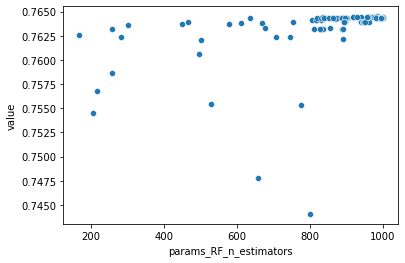

In [10]:
sns.scatterplot(data=opt_results, x='params_RF_n_estimators', y='value')

<AxesSubplot:xlabel='params_RF_bootstrap', ylabel='value'>

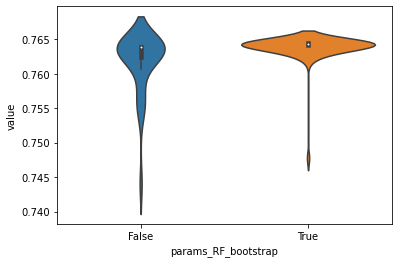

In [11]:
sns.violinplot(data=opt_results, x='params_RF_bootstrap', y='value')

<AxesSubplot:xlabel='params_RF_min_samples_leaf', ylabel='value'>

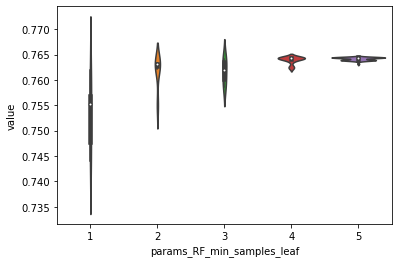

In [12]:
sns.violinplot(data=opt_results, x='params_RF_min_samples_leaf', y='value')

<AxesSubplot:xlabel='params_RF_min_samples_split', ylabel='value'>

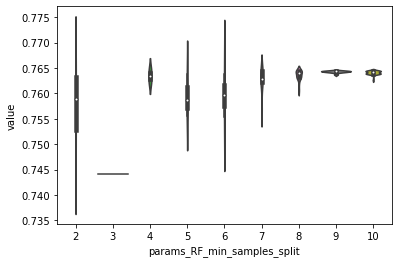

In [13]:
sns.violinplot(data=opt_results, x='params_RF_min_samples_split', y='value')

In [7]:
opt_results

,number,value,datetime_start,datetime_complete,duration,params_RF_bootstrap,params_RF_min_samples_leaf,params_RF_min_samples_split,params_RF_n_estimators,state
0,0,0.764337,2021-08-14 12:47:05.009042,2021-08-14 12:56:02.838047,0 days 00:08:57.829005,True,5,10,862,COMPLETE
1,1,0.762410,2021-08-14 12:47:05.012828,2021-08-14 12:50:12.540099,0 days 00:03:07.527271,False,4,4,282,COMPLETE
2,2,0.763163,2021-08-14 12:47:05.015951,2021-08-14 12:48:57.554232,0 days 00:01:52.538281,True,5,2,258,COMPLETE
3,3,0.760647,2021-08-14 12:47:05.019840,2021-08-14 12:53:12.771994,0 days 00:06:07.752154,False,3,8,495,COMPLETE
4,4,0.764332,2021-08-14 12:47:05.023657,2021-08-14 12:54:24.307964,0 days 00:07:19.284307,True,5,8,636,COMPLETE
...,...,...,...,...,...,...,...,...,...,...
95,95,0.763915,2021-08-14 13:37:49.417597,2021-08-14 13:49:48.294371,0 days 00:11:58.876774,False,5,10,949,COMPLETE
96,96,0.763910,2021-08-14 13:40:47.491160,2021-08-14 13:51:19.066883,0 days 00:10:31.575723,False,5,10,952,COMPLETE
97,97,0.764455,2021-08-14 13:41:42.235628,2021-08-14 13:48:34.633905,0 days 00:06:52.398277,True,5,10,959,COMPLETE
98,98,0.764455,2021-08-14 13:42:57.615016,2021-08-14 13:50:09.388195,0 days 00:07:11.773179,True,5,10,959,COMPLETE


In [ ]:
sns.violinplot(data=opt_results, x='params_RF_min_samples_split', y='value')